In [3]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

## Import data

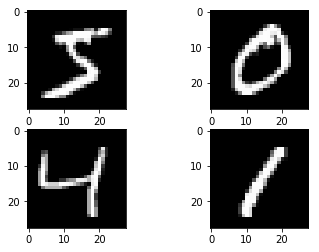

In [21]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## MLP model

In [4]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

#### Flatten images

In [22]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#### Normalize the range

In [23]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#### One hot encode output vector

In [9]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
len(y_train[0])

#### Model

In [14]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### Train and test

In [17]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.86%


## Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.7, solver ='lbfgs')
lr_2 = LogisticRegression(multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)

In [31]:
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [33]:
lr_2.fit(X_train, y_train)
y_predict2 = lr_2.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_pred=y_predict, y_true=y_test)

0.9201

In [36]:
accuracy_score(y_pred=y_predict2, y_true=y_test)

0.926

## CNN

In [37]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

#### Get data

In [38]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

#### Feature preprocessing

In [39]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#### CNN

In [40]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [46]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
12s - loss: 0.2378 - acc: 0.9310 - val_loss: 0.0734 - val_acc: 0.9780
Epoch 2/10
10s - loss: 0.0707 - acc: 0.9791 - val_loss: 0.0505 - val_acc: 0.9844
Epoch 3/10
13s - loss: 0.0517 - acc: 0.9843 - val_loss: 0.0455 - val_acc: 0.9858
Epoch 4/10
8s - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0403 - val_acc: 0.9855
Epoch 5/10
8s - loss: 0.0332 - acc: 0.9894 - val_loss: 0.0362 - val_acc: 0.9873
Epoch 6/10
9s - loss: 0.0287 - acc: 0.9907 - val_loss: 0.0339 - val_acc: 0.9883
Epoch 7/10
10s - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 8/10
11s - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0347 - val_acc: 0.9890
Epoch 9/10
12s - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0388 - val_acc: 0.9886
Epoch 10/10
9s - loss: 0.0139 - acc: 0.9954 - val_loss: 0.0348 - val_acc: 0.9884
CNN Error: 1.16%


## Deeper model

In [151]:
# define the larger model
def larger_larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [45]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.3752 - acc: 0.8864 - val_loss: 0.0785 - val_acc: 0.9743
Epoch 2/10
6s - loss: 0.0933 - acc: 0.9721 - val_loss: 0.0466 - val_acc: 0.9857
Epoch 3/10
6s - loss: 0.0683 - acc: 0.9786 - val_loss: 0.0370 - val_acc: 0.9895
Epoch 4/10
6s - loss: 0.0553 - acc: 0.9825 - val_loss: 0.0357 - val_acc: 0.9880
Epoch 5/10
6s - loss: 0.0479 - acc: 0.9851 - val_loss: 0.0292 - val_acc: 0.9902
Epoch 6/10
6s - loss: 0.0429 - acc: 0.9863 - val_loss: 0.0276 - val_acc: 0.9914
Epoch 7/10
6s - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0317 - val_acc: 0.9897
Epoch 8/10
6s - loss: 0.0347 - acc: 0.9888 - val_loss: 0.0257 - val_acc: 0.9912
Epoch 9/10
6s - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0239 - val_acc: 0.9922
Epoch 10/10
8s - loss: 0.0301 - acc: 0.9903 - val_loss: 0.0239 - val_acc: 0.9922
Large CNN Error: 0.78%


## On Kaggle data

In [95]:
import pandas as pd
df_kaggle = pd.read_csv("train.csv")
df_kaggle.head()

data_kaggle = df_kaggle.values

In [96]:
X_kaggle = data_kaggle[:,1:]/255
y_kaggle = data_kaggle[:,0]

In [97]:
import numpy as np

#### Data prep

In [98]:
X_kaggle = X_kaggle.reshape(X_kaggle.shape[0], 1, 28, 28).astype('float32')

In [99]:
y_kaggle = np_utils.to_categorical(y_kaggle)

### Split the data

In [100]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_kaggle, y_kaggle, test_size=0.15, random_state=42)

In [155]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 35700 samples, validate on 6300 samples
Epoch 1/1000
6s - loss: 0.5545 - acc: 0.8298 - val_loss: 0.1430 - val_acc: 0.9587
Epoch 2/1000
3s - loss: 0.1303 - acc: 0.9599 - val_loss: 0.0876 - val_acc: 0.9724
Epoch 3/1000
4s - loss: 0.0926 - acc: 0.9721 - val_loss: 0.0711 - val_acc: 0.9794
Epoch 4/1000
4s - loss: 0.0745 - acc: 0.9767 - val_loss: 0.0574 - val_acc: 0.9824
Epoch 5/1000
4s - loss: 0.0650 - acc: 0.9799 - val_loss: 0.0559 - val_acc: 0.9824
Epoch 6/1000
4s - loss: 0.0547 - acc: 0.9827 - val_loss: 0.0437 - val_acc: 0.9863
Epoch 7/1000
4s - loss: 0.0507 - acc: 0.9840 - val_loss: 0.0475 - val_acc: 0.9857
Epoch 8/1000
3s - loss: 0.0449 - acc: 0.9862 - val_loss: 0.0466 - val_acc: 0.9859
Epoch 9/1000
3s - loss: 0.0423 - acc: 0.9864 - val_loss: 0.0424 - val_acc: 0.9868
Epoch 10/1000
4s - loss: 0.0389 - acc: 0.9876 - val_loss: 0.0414 - val_acc: 0.9860
Epoch 11/1000
4s - loss: 0.0341 - acc: 0.9887 - val_loss: 0.0376 - val_acc: 0.9879
Epoch 12/1000
4s - loss: 0.0335 - acc: 0.9889 -

In [156]:
df_kaggle_test = pd.read_csv("test.csv")

X_kaggle_test = df_kaggle_test.values
X_kaggle_test = X_kaggle_test.reshape(X_kaggle_test.shape[0], 1, 28, 28).astype('float32')

In [157]:
y_predict = model.predict(X_kaggle_test)

In [158]:
y_predict_class = [np.argmax(x) for x in y_predict]

In [159]:
len(y_predict_class)

28000

In [160]:
ids = np.arange(1,len(y_predict_class)+1)
len(ids)

28000

In [161]:
import collections


In [163]:
df_output = pd.DataFrame(collections.OrderedDict({
    "ImageId":ids,
    "Label":y_predict_class
}))

In [164]:
df_output.to_csv("output_kaggle_2.csv", index=False)